<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

**Задачи исследования:** 
1. Провести анализ общей информации.
2. Выполнить предобработку данных.
3. Провести исследовательский анализ данных. Выяснить какие факторы больше всего влияют на стоимость квартиры.
4. Составить выводы на основе полученных результатов.

**Исходные данные:** архив объявлений Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Результаты исследования помогут построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность. 
 

**Описание данных:**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [23]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_price,living_area_ratio,kitchen_area_ratio,weekday,month,year,floor_category,center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,755.0,<NA>,120370,47.0,23.0,четверг,март,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,NaN,81,82921,46.0,27.0,вторник,декабрь,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,574.0,558,92786,61.0,15.0,четверг,август,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,NaN,...,234.0,424,408176,28.0,6.0,пятница,июль,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,48.0,121,100000,32.0,41.0,вторник,июнь,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,55,95066,47.0,30.0,понедельник,сентябрь,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,NaN,155,99196,28.0,39.0,четверг,ноябрь,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,NaN,...,NaN,<NA>,110545,43.0,26.0,четверг,апрель,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,...,NaN,189,87455,47.0,27.0,среда,май,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,NaN,289,88525,71.0,11.0,воскресенье,февраль,2017,другой,15.0


### Вывод

Изучив общую информацию видим несколько проблем в исходных данных: в нескольких столбцах таблицы имеются пропущенные значения и тип данных float, заменим пропуски и изменим тип данных там, где это будет корректно. Причиной появления пропусков могут быть проблемы при выгрузке данных или ошибки при вводе данных. Также для удобства стоит привести столбец cityCenters_nearest к змеиному регистру.

## Предобработка данных

In [4]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)


ceiling_median = df['ceiling_height'].median() 
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_median) 

floors_median = df['floors_total'].median()
df['floors_total'] = df['floors_total'].fillna(floors_median)

df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median')) 
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median')) 

Изменим типы данных на еще более подходящие и замерим, сколько памяти в % мы сэкономим.

In [5]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: 
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2
    return "{:03.2f} MB".format(usage_mb)

df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(df_int))
print(mem_usage(converted_int))

df['balcony'] = df['balcony'].astype('int8')
df['floors_total'] = df['floors_total'].astype('int8')
df['parks_around3000'] = df['parks_around3000'].astype('int8')
df['ponds_around3000'] = df['ponds_around3000'].astype('int8')
df['last_price'] = df['last_price'].astype('int32')
df['days_exposition'] = df['days_exposition'].round().astype('Int32')


0.54 MB
0.07 MB


In [6]:
df['locality_name'] = df['locality_name'].replace('Мурино', 'посёлок Мурино')
df['locality_name'] = df['locality_name'].replace('поселок Мурино', 'посёлок Мурино')
df['locality_name'] = df['locality_name'].replace('Кудрово', 'деревня Кудрово')

### Вывод

Предположим, что пропуски в столбцах с количеством балконов и количеством парков и прудов в радиусе 3 км связаны с тем,
что их по просту нет. Заменим их на 0 методом .fillna(), позволяющим заменить все пропущенные значения в нужном столбце
датафрейма. NaN в столбцах с высотой потолков и количеством этажей заменим медианой, а в жилой площади и площади кухни медианой
в соответствии с количеством комнат квартир. Методом .rename изменим название cityCenters_nearest и уберем лишнюю информацию из столбца с датой размещения объявления: приведем дату к формату Year, month, day. Также изменим тип данных в 
столбцах с количеством балконов, этажей, дней размещения объявления, парков и прудов в радиусе 3 км и цены методом .astype()
Методом .replace() избавимся от неявных дубликтов в столбце с населенными пунктами. 

## Расчёты и добавление результатов в таблицу

In [7]:
df['square_price'] = (df['last_price'] / df['total_area']).round().astype('int')
df['living_area_ratio'] = ((df['living_area'] / df['total_area']) * 100).round()
df['kitchen_area_ratio'] = ((df['kitchen_area'] / df['total_area']) * 100).round()

df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

def weekday_name(day):
    if day == 0:
        return 'понедельник'
    if day == 1:
        return 'вторник'
    if day == 2:
        return 'среда'
    if day == 3:
        return 'четверг'
    if day == 4:
        return 'пятница'
    if day == 5:
        return 'суббота'
    if day == 6:
        return 'воскресенье'
    
def month_name(month):
    if month == 1:
        return 'январь'
    if month == 2:
        return 'февраль'
    if month == 3:
        return 'март'
    if month == 4:
        return 'апрель'
    if month == 5:
        return 'май'
    if month == 6:
        return 'июнь'
    if month == 7:
        return 'июль'
    if month == 8:
        return 'август'
    if month == 9:
        return 'сентябрь'
    if month == 10:
        return 'октябрь'
    if month == 11:
        return 'ноябрь'
    if month == 12:
        return 'декабрь'
    
def create_floor_category(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
       
df['weekday'] = df['weekday'].apply(weekday_name)
df['month'] = df['month'].apply(month_name)
df['floor_category'] = df.apply(create_floor_category, axis=1)

### Вывод

Добавим новые столбцы в нашу таблицу: посчитаем цену квадратного метра. Для этого поделим цену квартиры на её общую площадь, для удобства округлим полученное значение и приведем к целочисленному типу. Также посчитаем соотношение жилой и общей площади, и отношение площади кухни к общей, результаты округлим и занесем в square_price, living_area_ratio и kitchen_area_ratio соответственно. 
Методом .dt.weekday, .dt.month, .dt.year внесем в новые столбцы датафрейма данные о дате публикации объявления: день, месяц, год. Для лучшего восприятия напишем функции, которые заменят цифры в этих столбцах на соответствующий день или месяц в текстовом формате и применим их к нужным стоблцам методом .apply(). Также напишем функцию, которая проведет категоризацию этажа квартиры и вернет одно из трёх значений: первый, последний, другой и применим ее указав параметр axis=1, чтобы на вход в функцию отправлялись строки.

## Исследовательский анализ данных

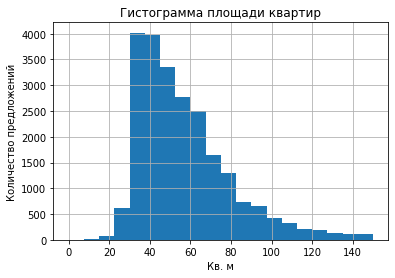

In [8]:
#df['total_area'].hist(bins=20, range=(0,150)); 
plt.hist(x=df['total_area'], bins=20, range=(0,150))
plt.xlabel('Кв. м')
plt.ylabel('Количество предложений')
plt.title('Гистограмма площади квартир')
plt.grid(True)
plt.show;

### Вывод:

Выясним площадь предложенных квартир. Построим гистограмму методом .hist(). Изучив ее мы видим, что большинство квартир имеют площаль около 35 кв м, чуть меньше квартир с площадью около 40 кв м. 

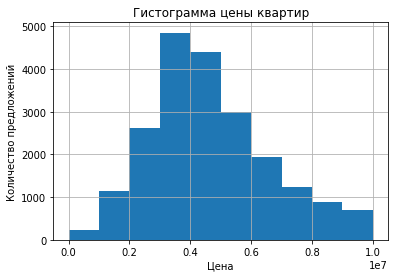

In [9]:
#df['last_price'].hist(bins=10, range=(0,10000000));
plt.hist(x=df['last_price'], bins=10, range=(0,10000000))
plt.xlabel('Цена')
plt.ylabel('Количество предложений')
plt.title('Гистограмма цены квартир')
plt.grid(True)
plt.show;

Построим гистограмму цены, ограничив значение в 10 млн. Изучив гистограмму можем сделать вывод, что цена большинства квартир находится в радиусе около 3-4 млн рублей.

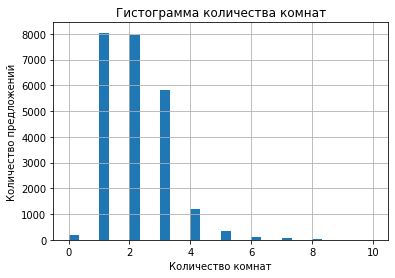

In [10]:
#df['rooms'].hist(bins=30, range=(0,10)); 
plt.hist(x=df['rooms'], bins=30, range=(0,10))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.title('Гистограмма количества комнат')
plt.grid(True)
plt.show;

По гистограммме количества комнат делаем вывод, что большинство предложенных квартир однокомнатные: их чуть больше 8 тысяч, двухкомнатных квартир чуть меньше 8 тысяч, трёхкомнатных менее 6 тысяч.

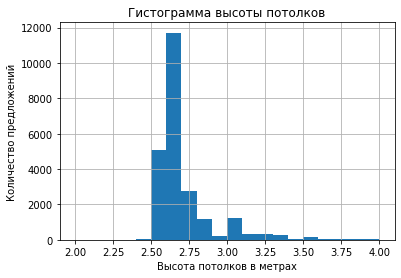

In [11]:
#df['ceiling_height'].hist(bins=20, range=(2,4));
plt.hist(x=df['ceiling_height'], bins=20, range=(2,4))
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество предложений')
plt.title('Гистограмма высоты потолков')
plt.grid(True)
plt.show;

Гистограмма высоты потолков показывает, что большинство квартир (около 10 тысяч) имеют высоту потолков примерно 2.6 м.  

Среднее: 181
Медиана: 95


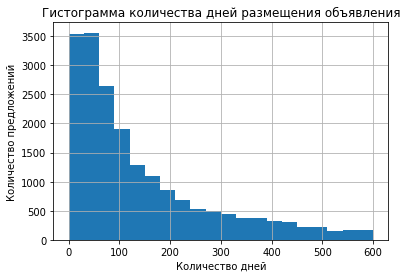

In [12]:
df['days_exposition'].hist(bins=20, range=(0,600));
print('Среднее:', df['days_exposition'].mean().round().astype('int'))
print('Медиана:', df['days_exposition'].median().astype('int'))

#plt.hist(x=df['days_exposition'], bins=20, range=(0,600))
plt.xlabel('Количество дней')
plt.ylabel('Количество предложений')
plt.title('Гистограмма количества дней размещения объявления')
plt.grid(True)
plt.show;

По гистограмме количества дней размещения объявления можно сделать вывод, что большинство квартир продаются около двух месяцев, среднее время продажи: 181 день.

Корреляция 0.6536750579657242


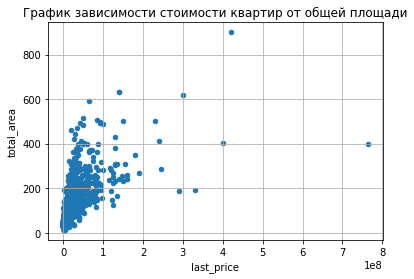

In [13]:
df.plot(title='График зависимости стоимости квартир от общей площади',
        x='last_price',
        y='total_area',
        kind='scatter',
        grid=True);

print('Корреляция', df['total_area'].corr(df['last_price']))

Построим график и изучим зависимость стоимости от общей площади квартиры. Изучив его и посчитав коэффицент корреляции можно сделать вывод, что зависимость действительно есть, чем больше площадь, тем больше цена.

Корреляция 0.3633428499648948


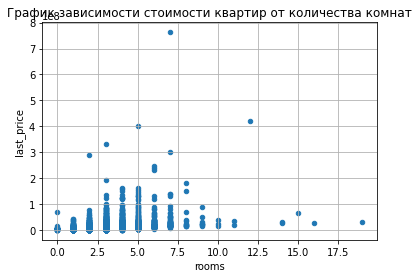

In [14]:
df.plot(title='График зависимости стоимости квартир от количества комнат',
        x='rooms',
        y='last_price',
        kind='scatter',
        grid=True);
print('Корреляция', df['rooms'].corr(df['last_price']))

Корреляция в 0.36 говорит о наличии слабой связи между количеством комнат и стоимость, однако она гораздо меньше, чем в случае с площадью. По графику видим возрастание цены в промежутке от 1 комнаты до 5.

Корреляция -0.20674734874298373


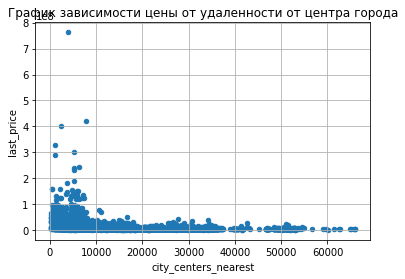

In [15]:
df.plot(title='График зависимости цены от удаленности от центра города', 
        x='city_centers_nearest',
        y='last_price', 
        kind='scatter', 
        grid=True);
print('Корреляция', df['city_centers_nearest'].corr(df['last_price']))

По графику зависимости цены от удаленности от центра города и коэффициенту корреляции можно сказать, что взаимосвязи в данном случае парктически нет. Однако квартиры на расстоянии менее 10 км от центра действительно имеют большую стоимость, по сравнению с остальными.

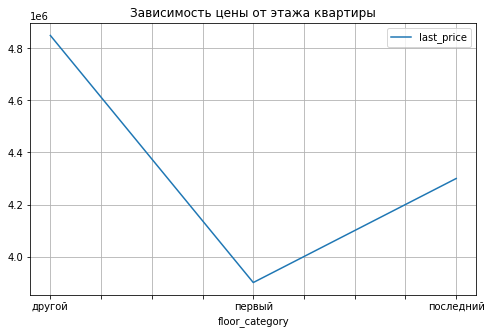

In [16]:
(
    df
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от этажа квартиры', grid=True, figsize=(8,5))
);

Медиана стоимости квартир по отношению с категорией этажа показывает, что расположенные на первом этаже квартиры имеют меньшую стоимость, чем на последнем, но квартиры на других этажах стоят еще дороже. 

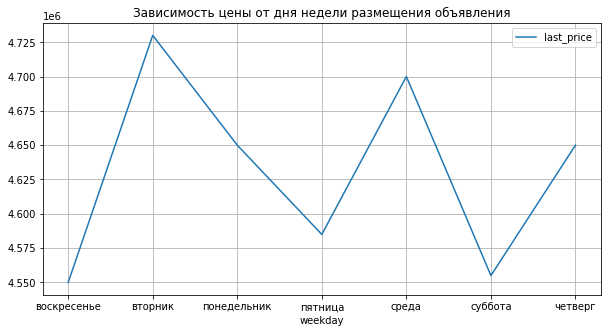

In [17]:
(
    df
    .pivot_table(index='weekday', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от дня недели размещения объявления', grid=True, figsize=(10,5))
);

Квартиры, опубликованные в выходные дни имеют меньшую стоимость, по сравнению с будними днями. Самая высокая стоимость наблюдается во вторник, самая низкая - в воскресенье. 

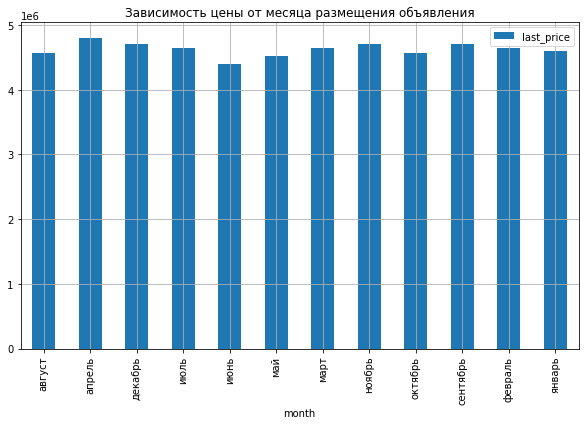

In [18]:
(
    df
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от месяца размещения объявления', kind='bar', grid=True, figsize=(10,6))
);

В случае с месяцем публикации объявления самая низкая цена наблюдается в июне, самая высокая - в апреле. Но в целом различия в стоимости по месяцам минимальны.

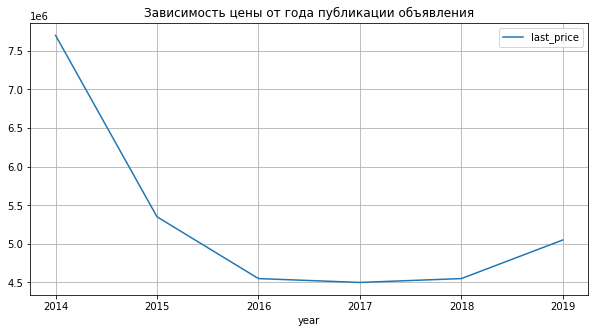

In [19]:
(
    df
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от года публикации объявления', grid=True, figsize=(10,5))
);

По графику зависимости цены от года публикации объяления видим, что квартиры, выложенные на продажу в 2014 году выделяются по сравнению с остальными годами, от 2014 до 2016 года идет снижение средней стоимости, два последующих года различия минимальны и начиная с 2018 стоимость начала увеличиваться.

In [20]:
print(df['locality_name'].value_counts().head(10))

ten = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино','посёлок Парголово', 'Гатчина','деревня Кудрово','Выборг']

top10 = (
    df
    .query('locality_name in @ten')
    .pivot_table(index='locality_name', values='square_price', aggfunc='median')
)

display(top10.sort_values(by='square_price', ascending=False))

Санкт-Петербург      15721
посёлок Мурино         590
деревня Кудрово        472
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64


,square_price
locality_name,
Санкт-Петербург,104762.0
Пушкин,100000.0
деревня Кудрово,95675.5
посёлок Парголово,91643.0
посёлок Мурино,86175.5
посёлок Шушары,76876.0
Колпино,74723.5
Гатчина,67797.0
Всеволожск,65789.0


Найдем 10 населённых пунктов с наибольшим числом объявлений методом .value_counts(). Cохраним результаты в список ten. Сделаем срез данных исходной таблицы, добавим в нашу новую таблицу только те населенные пункты, которые есть в списке с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населенных пунктах. В результате видим, что самая высокая цена квадратного метра в Санкт-Петербурге, самая низкая - в Выборге. 

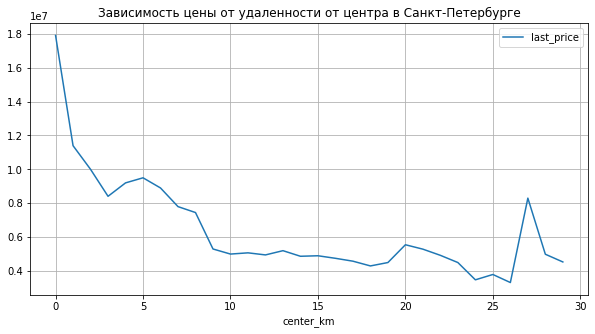

In [21]:
df['center_km'] = (df['city_centers_nearest'] / 1000).round()

(
    df
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от удаленности от центра в Санкт-Петербурге', grid=True, figsize=(10,5))
);

Создадим столбец center_km, который будет содержать в себе расстояние до центра города в километрах, округлим это значение. 
Построим график зависимости цены от удаленности от центра в городе Санкт-Петербург. Изучив его можем сделать вывод, что чем ближе квартира располагается к центру, тем выше ее стоимость, однако это правило не работает для квартир, расположенных дальше 8 км. Отбросим значения больше 8 км, таким образом мы определим центральную область. Далее проанализируем ее. 

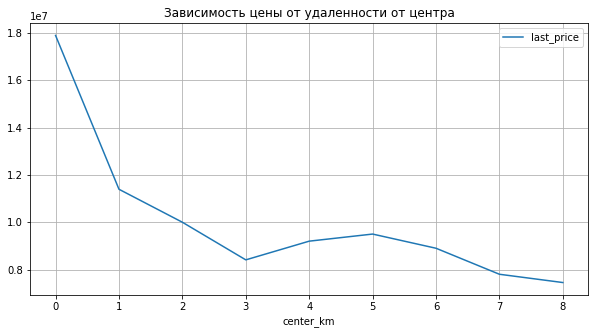

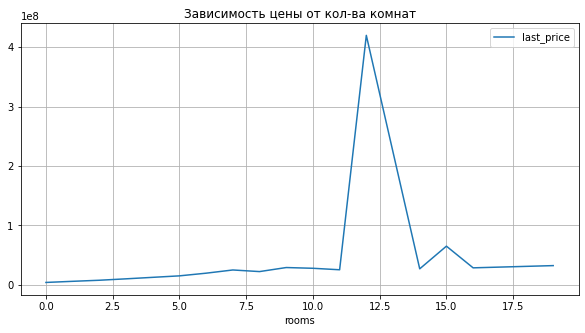

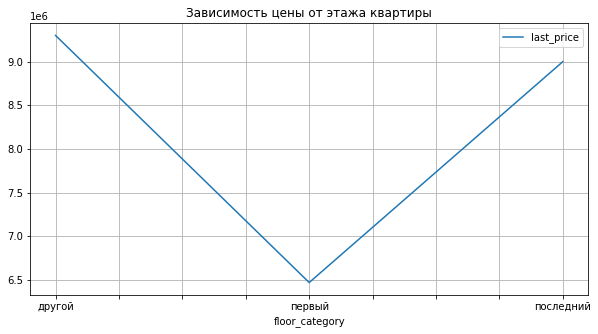

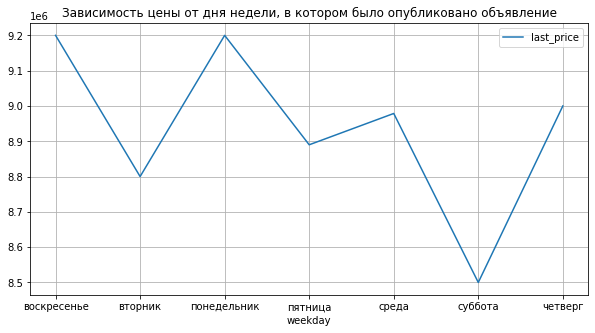

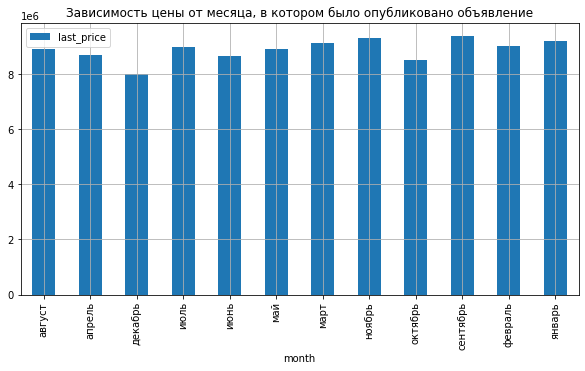

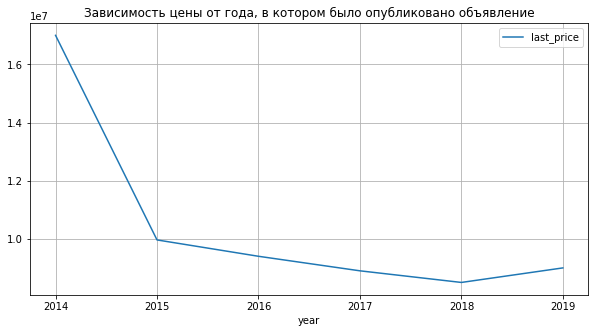

In [22]:
(
    df
    .query('locality_name =="Санкт-Петербург" and center_km <= 8')
    .pivot_table(index='center_km', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от удаленности от центра', grid=True, figsize=(10,5))
);

(
    df
    .query('locality_name =="Санкт-Петербург" and center_km <= 8')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от кол-ва комнат', grid=True, figsize=(10,5))
);

(
    df
    .query('locality_name =="Санкт-Петербург" and center_km <= 8')
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от этажа квартиры', grid=True, figsize=(10,5))
);

(
    df
    .query('locality_name =="Санкт-Петербург" and center_km <= 8')
    .pivot_table(index='weekday', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от дня недели, в котором было опубликовано объявление', grid=True, figsize=(10,5))
);    

(
    df
    .query('locality_name =="Санкт-Петербург" and center_km <= 8')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от месяца, в котором было опубликовано объявление', kind='bar', grid=True, figsize=(10,5))
);    

(
    df
    .query('locality_name =="Санкт-Петербург" and center_km <= 8')
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от года, в котором было опубликовано объявление', grid=True, figsize=(10,5))
);     

+ По графику зависимости цены от удаленности от центра можем сделать вывод, что квартиры расположенные в километре от центра имеют наибольшую стоимость, далее наблюдается снижение цены.
+ График зависимости цены от количества комнат показывает плавное возрастание цены вместе с ростом количества комнат в квартире. Резкий скачок графика в районе 12 комнат может говорить о том, что объявлений с таким количеством квартир очень мало и медиана их стоимости значительно превышает медиану стоимости остальных.
+ График зависимости цены от этажа квартиры в центре Санкт-Петербурга не сильно отличается от графика по общей таблице. Видим минимальную стоимость у квартир на первом этаже, большую цену у последнего и еще большую у других. 
+ Зато зависимость цены от дня недели публикации объявления в центре Санкт-Петербурга показывает минимальную стоимость в субботу, а не в воскресенье как у графика по исходной таблице. В воскресенье же средняя стоимость квартир находится в пике вместе с понедельником. Во вторник, который был пиковым днем по цене в предыдущем графике, средняя цена находится ниже остальных дней и опережает лишь самый низкий показатель в субботу.
+ По месяцам ситуация также немного изменилась, самый низкий показатель цены показывает декабрь, самый высокий - сентябрь.
+ Зависимость от года не изменилась, в 2014 году стоимость также выделяется среди остальных и до 18 года наблюдается снижение с небольшим возрастанием после.

## Общий вывод

В результате исследования мы выяснили какие факторы больше всего влияют на стоимость квартиры. Чтобы получить корректные ответы на вопросы была проведена предобработка исходного датафрейма: заполнение пропусков и изменение типов данных в нужных нам столбцах. Изучив предоставленные данные можно сделать несколько выводов: самые дорогие квартиры находятся в Санкт-Петербурге, медианная цена квадратного метра равна 104762 руб, самые дешевые - в Выборге: 58158 за квадратный метр. Наибольшее влияние на цену оказывает общая площадь квартиры и ее приближенность к центру, квартиры расположенные не более 8 км от центра стоят дороже прочих.